sierpinski_python  
==== 
[work in progress]  
<br />
Mathematica
----

One of the things I was looking forward to was seeing people try to implement some of the Mathematica algorithms from my [Sierpinski triangle page](http://www.oftenpaper.net/sierpinski.htm) in different languages. A large portion of those programs don't have straightforward analogues in other languages. Particularly, most languages have either no notion of pattern matching, or they have only simple forms of it.

Python
--

To my disappointment I didn't even hear any cries of pain of people attempting translations. But because I'm a language geek, I don't mind doing the dirty work myself. And I also want to spread the joy beyond just Mathematica. Since Python is a standard now almost everywhere, it's a good choice, and I like Python as well. I'm happy there's at least one mainstream language whose aesthetics aren't hideous.

For this project I'm going to try to convert as many algorithms from the original page as I can that are "within reach". In truth the limitation isn't really going to be algorithmic, but rather logistical in terms of the relative availabilities/conceptual costs of libraries. I'm using the Anaconda Python 3.4 distribution with the IPython/Jupyter notebook interface. Since I'm new to the language I might miss useful libraries and so on. But generally I try not to overdo things with libraries regardless.

The module that I use for this page is [sierpinski.py](sierpinski.py). This notebook itself is [sierpinski_python.ipynb](sierpinski_python.ipynb). For the various display views I rely on [flipbook_ipy.js](flipbook-ipy.js) and [oftencss_ipy.css](oftencss_ipy.css).

1\. [triangle in triangle](http://www.oftenpaper.net/flipbook-triangleintriangle.htm)

Right away we hit a snag. How to display vector graphics? SVG is probably the best bet, since IPython has an SVG display function. No doubt there are good vector graphics libraries but it's simple enough that I would rather just make the kind of graphics system I want. Here is the graphics format I ended up with:

In [1]:
from sierpinski import *

graphics([
    ["opacity: .2; stroke: none",
        ["red", polygon([[0,0], [200,0],[200,200]])],
        ["blue", polygon([[0,0], [0,200], [200,200]])]],
    ["stroke: purple; stroke-opacity: .4;", line([[180,25], [25,180]])],
    "lightyellow", "stroke: none", disk([50,90], 25), disk([90,50], 25),
    "orange", rectangle(c=[146,146], wh=[50,50]),
        rectangle([[10,10],[30,30]]), rectangle([[30,30],[45,45]]),
    "fill: #888", rectangle(c=[102.5,102.5], wh=[7.5,7.5]),
    "stroke: #888; stroke-opacity: .6",
    line([[152,185],[185,185],[185,82]])])

<span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';; ' viewBox='-2.0 -2.0 204.0 204.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='opacity: .2; stroke: none'><g style='fill: red'><path style='' d='M 0 0 L 200 0 L 200 200 Z'/></g><g style='fill: blue'><path style='' d='M 0 0 L 0 200 L 200 200 Z'/></g></g><g style='stroke: purple; stroke-opacity: .4;'><path style='fill: none' d='M 180 25 L 25 180'/></g><g style='fill: lightyellow'><g style='stroke: none'><circle r='25' cy='90' cx='50'/><circle r='25' cy='50' cx='90'/><g style='fill: orange'><rect width='50' height='50' y='121.0' x='121.0'/><rect width='20' height='20' y='10' x='10'/><rect width='15' height='15' y='30' x='30'/><g style='fill: #888'><rect width='7.5' height='7.5' y='98.75' x='98.75'/><g style='stroke: #888; stroke-opacity: .6'><path style='fill: none' d='M 152 185 L 185 185 L 185 82'/></g></g></g></g></g></g></svg></span>

OK, apparently I get carried away even when I'm just trying to demonstrate basic functionality. Here's a simpler demonstration:

In [2]:
graphics(["yellow", disk()])

<span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';; ' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='fill: yellow'><circle r='50' cy='0' cx='0'/></g></g></svg></span>

Of course the fun is in it being programmatic.

In [3]:
from numpy.random import rand

angles = np.linspace(-.08, .08 + .5*np.pi, 25);

g1 = graphics(["stroke-opacity: .35; stroke-linejoin: round",
          "stroke-linecap: round; stroke-width: 3; stroke: gold",
          [line(circle_points(3, radial_offset=k+np.pi/1.73-np.pi)) for k in angles]],
        padding=1.05)

points = lambda k: circle_points(3, c=25*rand(2), radial_offset=k+np.pi/1.73-np.pi)

# if a string isn't a named color, it is interpreted as an inline style directive
g2 = graphics(["stroke-opacity: .25; stroke-linejoin: round; stroke-width: 1",
          "stroke: purple; fill: black; fill-opacity: .4",
          [polygon(rand()*points(k)) for k in angles]],
        padding=1.1)

Gallery([g1, g2], name="gallery1")

<ol class='flipbook static' name='gallery1' id='s6921de9a-dffd-45d2-b1a7-0b16fd20f9e1'><li><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' padding='1.05' xmlns='http://www.w3.org/2000/svg' style=';; ' viewBox='-50.9995709142 -50.3127864667 101.967878246 101.298986543'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke-opacity: .35; stroke-linejoin: round'><g style='stroke-linecap: round; stroke-width: 3; stroke: gold'><path style='fill: none' d='M 8.22017162617 -49.3196591476 L 38.6019919147 31.7787070255 L -46.8221635409 17.5409521221'/><path style='fill: none' d='M 11.7524848652 -48.5991676831 L 36.2118713838 34.4775342924 L -47.964356249 14.1216333907'/><path style='fill: none' d='M 15.2237023661 -47.6260316032 L 33.6335020668 36.9971287903 L -48.8572044329 10.6289028129'/><path style='fill: none' d='M 18.6157788732 -46.4053097926 L 30.8802877143 39.3243923117 L -49.4960665874 7.08091748088'/><path style='fill: none' d='M 21.9110805481 -44.9433482199 L 27.9665410155 41.447226489 L -49.8776215636 3.49612173091'/><path style='fill: none' d='M 25.0924766402 -43.2477469478 L 24.9074091931 43.3545956882 L -49.9998858333 -0.106848740407'/><path style='fill: none' d='M 28.1434285413 -41.3273206238 L 21.7187952599 45.0365843783 L -49.8622238012 -3.70926375449'/><path style='fill: none' d='M 31.0480757623 -39.1920526569 L 18.4172753461 46.4844486772 L -49.4653511085 -7.29239602035'/><path style='fill: none' d='M 33.7913183845 -36.8530433186 L 15.0200125284 47.6906618076 L -48.8113309129 -10.837618489'/><path style='fill: none' d='M 36.3588955571 -34.3224520375 L 11.5446676061 48.6489532247 L -47.9035631632 -14.3265011872'/><path style='fill: none' d='M 38.7374596329 -31.6134341885 L 8.00930729171 49.3543412144 L -46.7467669246 -17.7409070259'/><path style='fill: none' d='M 40.9146455563 -28.7400727035 L 4.4323102897 49.8031587903 L -45.346955846 -21.0630860868'/><path style='fill: none' d='M 42.8791351438 -25.7173048611 L 0.832271754639 49.9930727574 L -43.7114068985 -24.2757678963'/><path style='fill: none' d='M 44.6207159219 -22.5608446344 L -2.77209337669 49.9230958406 L -41.8486225452 -27.3622512062'/><path style='fill: none' d='M 46.1303342167 -19.2871010017 L -6.36204767552 49.5935918176 L -39.7682865412 -30.3064908159'/><path style='fill: none' d='M 47.4001422205 -15.9130926434 L -9.91892862833 49.0062736276 L -37.4812135922 -33.0931809843'/><path style='fill: none' d='M 48.4235387881 -12.4563594696 L -13.4242456547 48.1641944665 L -34.9992931334 -35.7078349968'/><path style='fill: none' d='M 49.1952037537 -8.93487143904 L -16.8597762311 47.0717319146 L -32.3354275226 -38.1368604755'/><path style='fill: none' d='M 49.7111255877 -5.36693514056 L -20.2076606217 45.73456518 L -29.503464966 -40.3676300394'/><path style='fill: none' d='M 49.9686222509 -1.7710986263 L -23.4504947225 44.1596455746 L -26.5181275284 -42.3885469483'/><path style='fill: none' d='M 49.9663551372 1.8339450113 L -26.5714205375 42.3551603777 L -23.3949345997 -44.189105389'/><path style='fill: none' d='M 49.7043360322 5.42945481624 L -29.5542138156 40.330490274 L -20.1501222165 -45.7599450902'/><path style='fill: none' d='M 49.1839270521 8.9967393945 L -32.3833683929 38.0961605878 L -16.8005586592 -47.0928999823'/><path style='fill: none' d='M 48.4078335628 12.517254082 L -35.044176802 35.6637865666 L -13.3636567608 -48.1810406486'/><path style='fill: none' d='M 47.3800901158 15.9726973496 L -37.5228067296 33.046012999 L -9.85728338616 -49.0187103487'/></g></g></g></svg></span></li><li><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' padding='1.1' 

Testing <span name="gallery1" index="1" class="flipbookLink">testing</span>. 1 2 3 <span class="flipbookLink" name="gallery1" index="2">testing</span>.

In [4]:
n = 600
pts1 = circle_points(n);
pts2 = circle_points(n, radial_offset=np.pi/3)

graphics(["stroke-opacity: .2; stroke-linecap: round",
          [["stroke: hsl(" + str(i*360/n) +",100%,50%)", line([pts1[i],.478*pts2[i]])]
           for i in range(n)]],
         width=600, height=600)

<span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 600px; height: 600px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke-opacity: .2; stroke-linecap: round'><g style='stroke: hsl(0.0,100%,50%)'><path style='fill: none' d='M 50.0 0.0 L 11.95 20.6980071504'/></g><g style='stroke: hsl(0.6,100%,50%)'><path style='fill: none' d='M 49.9972584683 0.523589205812 L 11.7325997114 20.8220100858'/></g><g style='stroke: hsl(1.2,100%,50%)'><path style='fill: none' d='M 49.9890341737 1.04712099417 L 11.513912811 20.943729653'/></g><g style='stroke: hsl(1.8,100%,50%)'><path style='fill: none' d='M 49.9753280183 1.57053795391 L 11.2939632804 21.0631525044'/></g><g style='stroke: hsl(2.4,100%,50%)'><path style='fill: none' d='M 49.9561415049 2.09378268646 L 11.0727752394 21.1802655436'/></g><g style='stroke: hsl(3.0,100%,50%)'><path style='fill: none' d='M 49.9314767377 2.61679781215 L 10.8503729438 21.2950559281'/></g><g style='stroke: hsl(3.6,100%,50%)'><path style='fill: none' d='M 49.9013364214 3.13952597647 L 10.6267807825 21.4075110697'/></g><g style='stroke: hsl(4.2,100%,50%)'><path style='fill: none' d='M 49.8657238612 3.66190985638 L 10.402023275 21.5176186365'/></g><g style='stroke: hsl(4.8,100%,50%)'><path style='fill: none' d='M 49.8246429625 4.18389216662 L 10.1761250684 21.6253665539'/></g><g style='stroke: hsl(5.4,100%,50%)'><path style='fill: none' d='M 49.7780982302 4.70541566593 L 9.94911093502 21.7307430062'/></g><g style='stroke: hsl(6.0,100%,50%)'><path style='fill: none' d='M 49.7260947684 5.22642316338 L 9.72100576951 21.8337364377'/></g><g style='stroke: hsl(6.6,100%,50%)'><path style='fill: none' d='M 49.66863828 5.74685752464 L 9.49183458617 21.9343355538'/></g><g style='stroke: hsl(7.2,100%,50%)'><path style='fill: none' d='M 49.6057350657 6.26666167822 L 9.26162251621 22.032529323'/></g><g style='stroke: hsl(7.8,100%,50%)'><path style='fill: none' d='M 49.5373920236 6.78577862172 L 9.03039480496 22.128306977'/></g><g style='stroke: hsl(8.4,100%,50%)'><path style='fill: none' d='M 49.4636166481 7.30415142812 L 8.79817680916 22.2216580127'/></g><g style='stroke: hsl(9.0,100%,50%)'><path style='fill: none' d='M 49.3844170298 7.82172325201 L 8.56499399413 22.3125721933'/></g><g style='stroke: hsl(9.6,100%,50%)'><path style='fill: none' d='M 49.2998018535 8.33843733581 L 8.33087193099 22.4010395489'/></g><g style='stroke: hsl(10.2,100%,50%)'><path style='fill: none' d='M 49.2097803985 8.85423701598 L 8.09583629386 22.487050378'/></g><g style='stroke: hsl(10.8,100%,50%)'><path style='fill: none' d='M 49.1143625364 9.36906572929 L 7.85991285705 22.5705952487'/></g><g style='stroke: hsl(11.4,100%,50%)'><path style='fill: none' d='M 49.0135587311 9.88286701896 L 7.62312749222 22.6516649992'/></g><g style='stroke: hsl(12.0,100%,50%)'><path style='fill: none' d='M 48.9073800367 10.3955845409 L 7.38550616556 22.7302507395'/></g><g style='stroke: hsl(12.6,100%,50%)'><path style='fill: none' d='M 48.7958380969 10.9071620698 L 7.14707493492 22.8063438515'/></g><g style='stroke: hsl(13.2,100%,50%)'><path style='fill: none' d='M 48.6789451437 11.4175435055 L 6.90785994697 22.879935991'/></g><g style='stroke: hsl(13.8,100%,50%)'><path style='fill: none' d='M 48.5567139955 11.9266728789 L 6.66788743434 22.9510190877'/></g><g style='stroke: hsl(14.4,100%,50%)'><path style='fill: none' d='M 48.4291580564 12.4344943582 L 6.4271837127 23.0195853465'/></g><g style='stroke: hsl(15.0,100%,50%)'><path style='fill: none' d='M 48.2962913145 12.9409522551 L 6.18577517795 23.0856272483'/></g><g style='stroke: hsl(15.6,100%,50%)'><path style='fill: none' d='M 48.1581283399 13.4459910308 L 5.94368830324 23.149137551'/></g><g style='stroke: hsl(16.2,10

Those who have used Mathematica will recognize the list-based graphics directives, which I've found convenient. A key difference is that in our Python version here, `line` is a strict function. It executes and returns something. In Mathematica, the `Line` *symbol* just remains in its unevaluated form, which lets us do further pattern matching or processing before we send it off to the `Graphics` function that interprets that structure as a visual line.

For the first Mathematica program, I use that capability by iteratively replacing each `Polygon` structure with 3 `Polygon` substructures, which is practically a direct translation of the mathematical description:

    axiom = Polygon[{{0, 0}, {1, Sqrt[3]}/2, {1, 0}}];

    next[prev_] := prev /. Polygon[{p1_, p2_, p3_}] :> {
         Polygon[{p1, (p1 + p2)/2, (p1 + p3)/2}],
         Polygon[{p2, (p2 + p3)/2, (p1 + p2)/2}],
         Polygon[{p3, (p1 + p3)/2, (p2 + p3)/2}]};

    draw[n_] := Graphics[{EdgeForm[Black],
        Nest[next, N@axiom, n]}];

In fact an even more direct form is possible in the form of a recursive definition. In Python we don't have these capabilities short of ill-advised domain-specific languages. Truthfully though we don't need anything fancy.

In [5]:
initial = [0, 500] - 500*np.array([[0, 0],[1/2, np.sqrt(3)/2],[1, 0]])

def subtriangles(pts, depth):
    if depth == 0:
        yield pts
    else:
        p1, p2, p3 = pts
        subtris = [[p1, (p1 + p2) / 2, (p1 + p3) / 2],
                   [p2, (p2 + p3) / 2, (p1 + p2) / 2],
                   [p3, (p1 + p3) / 2, (p2 + p3) / 2]];
        
        for subpts in subtris:
            yield from subtriangles(subpts, depth - 1)
        
Gallery([graphics(["fill: none; stroke: black; stroke-width: 2",
           [polygon(t) for t in subtriangles(initial, 3)]]),
         graphics([polygon(t) for t in subtriangles(initial, 3)])])

<ol class='flipbook static' id='s7181908e-3aa1-4471-ad5c-a372ea166a33'><li><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';; ' viewBox='-505.0 62.6571710889 510.0 441.67295593'><g style='stroke: black; stroke-width: 1; fill: black'><g style='fill: none; stroke: black; stroke-width: 2'><path style='' d='M 0.0 500.0 L -31.25 445.873412263 L -62.5 500.0 Z'/><path style='' d='M -62.5 391.746824527 L -93.75 445.873412263 L -31.25 445.873412263 Z'/><path style='' d='M -125.0 500.0 L -62.5 500.0 L -93.75 445.873412263 Z'/><path style='' d='M -125.0 283.493649054 L -156.25 337.62023679 L -93.75 337.62023679 Z'/><path style='' d='M -187.5 391.746824527 L -125.0 391.746824527 L -156.25 337.62023679 Z'/><path style='' d='M -62.5 391.746824527 L -93.75 337.62023679 L -125.0 391.746824527 Z'/><path style='' d='M -250.0 500.0 L -187.5 500.0 L -218.75 445.873412263 Z'/><path style='' d='M -125.0 500.0 L -156.25 445.873412263 L -187.5 500.0 Z'/><path style='' d='M -187.5 391.746824527 L -218.75 445.873412263 L -156.25 445.873412263 Z'/><path style='' d='M -250.0 66.9872981078 L -281.25 121.113885844 L -218.75 121.113885844 Z'/><path style='' d='M -312.5 175.240473581 L -250.0 175.240473581 L -281.25 121.113885844 Z'/><path style='' d='M -187.5 175.240473581 L -218.75 121.113885844 L -250.0 175.240473581 Z'/><path style='' d='M -375.0 283.493649054 L -312.5 283.493649054 L -343.75 229.367061317 Z'/><path style='' d='M -250.0 283.493649054 L -281.25 229.367061317 L -312.5 283.493649054 Z'/><path style='' d='M -312.5 175.240473581 L -343.75 229.367061317 L -281.25 229.367061317 Z'/><path style='' d='M -125.0 283.493649054 L -156.25 229.367061317 L -187.5 283.493649054 Z'/><path style='' d='M -187.5 175.240473581 L -218.75 229.367061317 L -156.25 229.367061317 Z'/><path style='' d='M -250.0 283.493649054 L -187.5 283.493649054 L -218.75 229.367061317 Z'/><path style='' d='M -500.0 500.0 L -437.5 500.0 L -468.75 445.873412263 Z'/><path style='' d='M -375.0 500.0 L -406.25 445.873412263 L -437.5 500.0 Z'/><path style='' d='M -437.5 391.746824527 L -468.75 445.873412263 L -406.25 445.873412263 Z'/><path style='' d='M -250.0 500.0 L -281.25 445.873412263 L -312.5 500.0 Z'/><path style='' d='M -312.5 391.746824527 L -343.75 445.873412263 L -281.25 445.873412263 Z'/><path style='' d='M -375.0 500.0 L -312.5 500.0 L -343.75 445.873412263 Z'/><path style='' d='M -375.0 283.493649054 L -406.25 337.62023679 L -343.75 337.62023679 Z'/><path style='' d='M -437.5 391.746824527 L -375.0 391.746824527 L -406.25 337.62023679 Z'/><path style='' d='M -312.5 391.746824527 L -343.75 337.62023679 L -375.0 391.746824527 Z'/></g></g></svg></span></li><li><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';; ' viewBox='-505.0 62.6571710889 510.0 441.67295593'><g style='stroke: black; stroke-width: 1; fill: black'><path style='' d='M 0.0 500.0 L -31.25 445.873412263 L -62.5 500.0 Z'/><path style='' d='M -62.5 391.746824527 L -93.75 445.873412263 L -31.25 445.873412263 Z'/><path style='' d='M -125.0 500.0 L -62.5 500.0 L -93.75 445.873412263 Z'/><path style='' d='M -125.0 283.493649054 L -156.25 337.62023679 L -93.75 337.62023679 Z'/><path style='' d='M -187.5 391.746824527 L -125.0 391.746824527 L -156.25 337.62023679 Z'/><path style='' d='M -62.5 391.746824527 L -93.75 337.62023679 L -125.0 391.746824527 Z'/><path style='' d='M -250.0 500.0 L -187.5 500.0 L -218.75 445.873412263 Z'/><path style='' d='M -125.0 500.0 L -156.25 445.873412263 L -187.5 500.0 Z'/><path style='' d='M -187.5 391.746824527 L

Thanks in large part to numpy's vectorizations, the code is about as good as the Mathematica version. For the iteration, a flat-map approach is probably what first comes to mind, but with generators we can avoid that kind of restructuring.

2\. [l system](http://www.oftenpaper.net/flipbook-l-system.htm)

Using the same generator approach we can handle the L-system algorithm quite well.

In [6]:
axiom = ['A'];
rules = {'A': ['B', 'R', 'A', 'R', 'B'],
         'B': ['A', 'L', 'B', 'L', 'A']}

angle_rules = {'A': 0, 'B': 0, 'L': -2*np.pi/6, 'R': 2*np.pi/6}

def lsystem(chars, depth):
    if depth == 0:
        yield from chars
    else:
        for f in chars:
            yield from lsystem(rules.get(f, f), depth - 1)
            
angles = [angle_rules.get(sym, 0) for sym in list(lsystem(axiom, 6))]

a, d = -np.pi/3, 3
path = [0]*(len(angles)+1)

for i in range(len(angles)):
    a += angles[i]
    path[i+1] = path[i] + d*np.e**(1j*a)
    
graphics(["stroke-width: 2; stroke-linejoin: round", line([re_im(z) for z in path])])

<span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';; ' viewBox='-194.31 -333.25523563 388.62 336.554792419'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke-width: 2; stroke-linejoin: round'><path style='fill: none' d='M 0 0 L 1.5000000000000004 -2.598076211353316 L 1.1102230246251565e-15 -5.196152422706632 L -1.4999999999999982 -7.794228634059948 L -4.499999999999998 -7.794228634059948 L -7.499999999999998 -7.794228634059948 L -8.999999999999998 -10.392304845413264 L -10.499999999999998 -12.99038105676658 L -9.0 -15.588457268119896 L -7.500000000000001 -18.186533479473212 L -4.500000000000001 -18.186533479473212 L -1.5000000000000009 -18.186533479473212 L 4.440892098500626e-16 -15.588457268119896 L 1.5000000000000018 -12.99038105676658 L 4.500000000000002 -12.990381056766582 L 7.500000000000002 -12.990381056766584 L 9.0 -15.5884572681199 L 10.5 -18.186533479473216 L 9.0 -20.78460969082653 L 7.499999999999999 -23.382685902179848 L 8.999999999999998 -25.980762113533164 L 10.499999999999996 -28.57883832488648 L 13.499999999999996 -28.57883832488648 L 16.499999999999996 -28.57883832488648 L 17.999999999999996 -31.176914536239796 L 19.499999999999996 -33.774990747593115 L 17.999999999999996 -36.37306695894643 L 16.499999999999996 -38.97114317029975 L 13.499999999999996 -38.97114317029975 L 10.499999999999996 -38.97114317029975 L 8.999999999999995 -36.37306695894643 L 7.499999999999993 -33.774990747593115 L 4.499999999999993 -33.774990747593115 L 1.499999999999993 -33.774990747593115 L -7.771561172376096e-15 -36.37306695894643 L -1.5000000000000084 -38.97114317029975 L -4.500000000000009 -38.97114317029975 L -7.500000000000009 -38.97114317029975 L -9.00000000000001 -36.37306695894643 L -10.500000000000012 -33.774990747593115 L -9.000000000000014 -31.1769145362398 L -7.500000000000016 -28.578838324886483 L -9.000000000000018 -25.980762113533167 L -10.50000000000002 -23.38268590217985 L -13.50000000000002 -23.38268590217985 L -16.50000000000002 -23.38268590217985 L -18.00000000000002 -25.980762113533167 L -19.50000000000002 -28.578838324886483 L -18.00000000000002 -31.1769145362398 L -16.50000000000002 -33.774990747593115 L -18.00000000000002 -36.37306695894643 L -19.50000000000002 -38.97114317029975 L -22.50000000000002 -38.97114317029975 L -25.50000000000002 -38.97114317029975 L -27.00000000000002 -41.56921938165306 L -28.50000000000002 -44.16729559300638 L -27.00000000000002 -46.765371804359695 L -25.50000000000002 -49.36344801571301 L -22.50000000000002 -49.36344801571301 L -19.50000000000002 -49.36344801571301 L -18.00000000000002 -51.96152422706633 L -16.50000000000002 -54.55960043841964 L -18.00000000000002 -57.15767664977296 L -19.50000000000002 -59.755752861126275 L -22.50000000000002 -59.755752861126275 L -25.50000000000002 -59.755752861126275 L -27.00000000000002 -57.15767664977296 L -28.50000000000002 -54.55960043841964 L -31.50000000000002 -54.55960043841964 L -34.50000000000002 -54.55960043841964 L -36.00000000000002 -57.15767664977296 L -37.50000000000002 -59.755752861126275 L -36.00000000000002 -62.35382907247959 L -34.50000000000002 -64.95190528383291 L -36.00000000000002 -67.54998149518623 L -37.50000000000002 -70.14805770653955 L -40.50000000000002 -70.14805770653955 L -43.50000000000002 -70.14805770653955 L -45.00000000000002 -72.74613391789286 L -46.50000000000002 -75.34421012924618 L -45.00000000000002 -77.9422863405995 L -43.50000000000002 -80.54036255195281 L -40.50000000000002 -80.54036255195281 L -37.50000000000002 -80.54036255195281 L -36.00000000000002 -77.9422863405995 L -34.50000000000002 -75.34421012924618 L -31.50000000000002 -75.34421012924618 L -28.50000000000002 -75.34421012924618 L -27.00000000000002 -77.9422863405995 L -25.50000000000002 -8

The pure symbol output after a few iterations:

In [7]:
print(list(lsystem(axiom, 3)))

['B', 'R', 'A', 'R', 'B', 'L', 'A', 'L', 'B', 'L', 'A', 'L', 'B', 'R', 'A', 'R', 'B', 'R', 'A', 'L', 'B', 'L', 'A', 'R', 'B', 'R', 'A', 'R', 'B', 'R', 'A', 'L', 'B', 'L', 'A', 'R', 'B', 'R', 'A', 'R', 'B', 'L', 'A', 'L', 'B', 'L', 'A', 'L', 'B', 'R', 'A', 'R', 'B']


See also:

In [8]:
angles = [0, 0] + [angle_rules.get(sym, 0) for sym in list(lsystem(axiom, 7))]
zs = np.cumsum(2*np.exp(1j*np.cumsum(angles)))
path = line([re_im(z) for z in zs])
path_offset = line([re_im(z) for z in zs - 1.75*(.3 + 1j)])

graphics(["stroke-linejoin: round",
        ["stroke-width: 7", "stroke: red; stroke-opacity: .02", path],
        ["stroke-width: 6", "stroke: blue; stroke-opacity: .15", path],
        ["stroke-width: 4; stroke-opacity: .4", path],
        ["stroke-width: 2.5", "stroke: white", path_offset]], width=1000, height=1000)

<span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 1000px; height: 1000px' viewBox='-3.63025 -6.20155006738 520.7355 454.058106872'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke-linejoin: round'><g style='stroke-width: 7'><g style='stroke: red; stroke-opacity: .02'><path style='fill: none' d='M 2.0 0.0 L 4.0 0.0 L 6.0 0.0 L 7.0 1.73205080757 L 8.0 3.46410161514 L 7.0 5.19615242271 L 6.0 6.92820323028 L 7.0 8.66025403784 L 8.0 10.3923048454 L 10.0 10.3923048454 L 12.0 10.3923048454 L 13.0 8.66025403784 L 14.0 6.92820323028 L 13.0 5.19615242271 L 12.0 3.46410161514 L 13.0 1.73205080757 L 14.0 8.881784197e-16 L 16.0 8.881784197e-16 L 18.0 8.881784197e-16 L 19.0 1.73205080757 L 20.0 3.46410161514 L 22.0 3.46410161514 L 24.0 3.46410161514 L 25.0 1.73205080757 L 26.0 8.881784197e-16 L 28.0 8.881784197e-16 L 30.0 8.881784197e-16 L 31.0 1.73205080757 L 32.0 3.46410161514 L 31.0 5.19615242271 L 30.0 6.92820323028 L 28.0 6.92820323028 L 26.0 6.92820323028 L 25.0 8.66025403784 L 24.0 10.3923048454 L 25.0 12.124355653 L 26.0 13.8564064606 L 25.0 15.5884572681 L 24.0 17.3205080757 L 22.0 17.3205080757 L 20.0 17.3205080757 L 19.0 15.5884572681 L 18.0 13.8564064606 L 16.0 13.8564064606 L 14.0 13.8564064606 L 13.0 15.5884572681 L 12.0 17.3205080757 L 13.0 19.0525588833 L 14.0 20.7846096908 L 16.0 20.7846096908 L 18.0 20.7846096908 L 19.0 22.5166604984 L 20.0 24.248711306 L 19.0 25.9807621135 L 18.0 27.7128129211 L 19.0 29.4448637287 L 20.0 31.1769145362 L 22.0 31.1769145362 L 24.0 31.1769145362 L 25.0 29.4448637287 L 26.0 27.7128129211 L 28.0 27.7128129211 L 30.0 27.7128129211 L 31.0 29.4448637287 L 32.0 31.1769145362 L 31.0 32.9089653438 L 30.0 34.6410161514 L 28.0 34.6410161514 L 26.0 34.6410161514 L 25.0 36.3730669589 L 24.0 38.1051177665 L 25.0 39.8371685741 L 26.0 41.5692193817 L 28.0 41.5692193817 L 30.0 41.5692193817 L 31.0 43.3012701892 L 32.0 45.0333209968 L 31.0 46.7653718044 L 30.0 48.4974226119 L 31.0 50.2294734195 L 32.0 51.9615242271 L 34.0 51.9615242271 L 36.0 51.9615242271 L 37.0 50.2294734195 L 38.0 48.4974226119 L 37.0 46.7653718044 L 36.0 45.0333209968 L 37.0 43.3012701892 L 38.0 41.5692193817 L 40.0 41.5692193817 L 42.0 41.5692193817 L 43.0 39.8371685741 L 44.0 38.1051177665 L 43.0 36.3730669589 L 42.0 34.6410161514 L 40.0 34.6410161514 L 38.0 34.6410161514 L 37.0 32.9089653438 L 36.0 31.1769145362 L 37.0 29.4448637287 L 38.0 27.7128129211 L 40.0 27.7128129211 L 42.0 27.7128129211 L 43.0 29.4448637287 L 44.0 31.1769145362 L 46.0 31.1769145362 L 48.0 31.1769145362 L 49.0 29.4448637287 L 50.0 27.7128129211 L 49.0 25.9807621135 L 48.0 24.248711306 L 49.0 22.5166604984 L 50.0 20.7846096908 L 52.0 20.7846096908 L 54.0 20.7846096908 L 55.0 19.0525588833 L 56.0 17.3205080757 L 55.0 15.5884572681 L 54.0 13.8564064606 L 52.0 13.8564064606 L 50.0 13.8564064606 L 49.0 15.5884572681 L 48.0 17.3205080757 L 46.0 17.3205080757 L 44.0 17.3205080757 L 43.0 15.5884572681 L 42.0 13.8564064606 L 43.0 12.124355653 L 44.0 10.3923048454 L 43.0 8.66025403784 L 42.0 6.92820323028 L 40.0 6.92820323028 L 38.0 6.92820323028 L 37.0 5.19615242271 L 36.0 3.46410161514 L 37.0 1.73205080757 L 38.0 4.4408920985e-16 L 40.0 1.33226762955e-15 L 42.0 2.22044604925e-15 L 43.0 1.73205080757 L 44.0 3.46410161514 L 46.0 3.46410161514 L 48.0 3.46410161514 L 49.0 1.73205080757 L 50.0 5.77315972805e-15 L 52.0 6.66133814775e-15 L 54.0 7.54951656745e-15 L 55.0 1.73205080757 L 56.0 3.46410161514 L 55.0 5.19615242271 L 54.0 6.92820323028 L 55.0 8.66025403784 L 56.0 10.3923048454 L 58.0 10.3923048454 L 60.0 10.3923048454 L 61.0 8.66025403784 L 62.0 6.92820323028 L 61.0 5.19615242271 L 60.0 3.46410161514 L 61.0 1.73205080757 L 62.0 1.11022302463e-14 L 64.0 1.1990408666e-14 L 66.0 1.28785870857e-14 L 67.0 1

3\. [cellular automata 1](http://www.oftenpaper.net/flipbook-cellularautomata1.htm)

As Mathematica often does, it cheats here by having a dedicated cellular automaton processor as a built-in function. It's a very customizable function, but for our purposes we only need the basic range-1 automata.

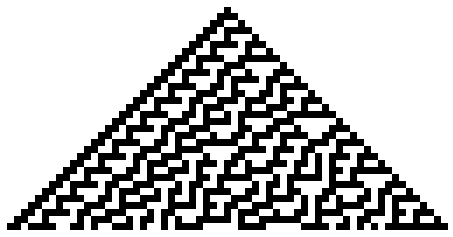

In [9]:
%matplotlib inline

tos = [map(int, reversed(format(n, "08b"))) for n in range(256)]
froms = [tuple(map(int, format(n, "03b"))) for n in range(8)]
rules = [dict(zip(froms, to)) for to in tos]

def cellular_automaton(N, steps=1, center=[1], background=0):
    state = [background]*steps + center + [background]*steps
    L = len(state)
    
    yield(state)
    for i in range(steps):
        nears = [(state[(i-1) % L], state[i], state[(i+1) % L]) for i in range(L)]
        state = [rules[N][near] for near in nears]
        yield state

array_plot(1 - np.array(list(cellular_automaton(30, 31))))

After a good fight I managed to get a basic image to show up in the notebook. Woo hoo. By comparison the cellular automaton function itself was easy. A cleaner display form I ran into *after* I stopped looking for it:

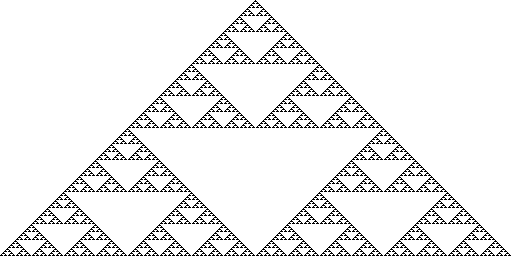

In [10]:
import scipy.misc as misc
misc.toimage(1-np.array(list(cellular_automaton(22, 2**8 - 1))))

4\. [pascal's triangle](http://www.oftenpaper.net/flipbook-pascal'striangle.htm)

We can quickly generate a Pascal grid from the binomial coefficient:

In [11]:
import scipy.misc as misc

def pascal_grid(size):
    return [[misc.comb(a, b, exact=True) for a in range(size)] for b in range(size)]

str(pascal_grid(8))

'[[1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7], [0, 0, 1, 3, 6, 10, 15, 21], [0, 0, 0, 1, 4, 10, 20, 35], [0, 0, 0, 0, 1, 5, 15, 35], [0, 0, 0, 0, 0, 1, 6, 21], [0, 0, 0, 0, 0, 0, 1, 7], [0, 0, 0, 0, 0, 0, 0, 1]]'

But since we're pretty gimped here in terms of layout, we'll have to settle for a simpler way of showing the odd numbers in Pascal's triangle:

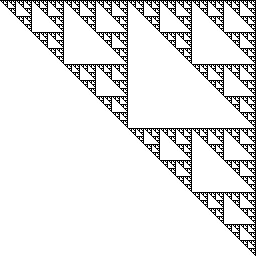

In [12]:
modulus = 2
misc.toimage(1 - np.array(pascal_grid(2**8)) % modulus)

But wait. What do I mean "gimped"? This is the internet by golly! Let's rewind that back and reformat our defeatist mindset. We can create a triangular Pascal array like so:

In [13]:
import scipy.misc as misc

def pascal_array(size):
    return [[misc.comb(b, a, exact=True) for a in range(b+1)] for b in range(size)]

str(pascal_array(8))

'[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1], [1, 5, 10, 10, 5, 1], [1, 6, 15, 20, 15, 6, 1], [1, 7, 21, 35, 35, 21, 7, 1]]'

With just some HTML/CSS stuff we can get the same kind of ad-hoc layout I made in Mathematica:

In [14]:
style = lambda n: "" if n % 2 else "border: 1px lightgray dotted; color: lightgray"
Column([Row([Frame(el, style=style(el)) for el in row]) for row in pascal_array(8)])

<table class='sierpinski Column'><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style=''>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style=''>1</span></td><td><span class='sierpinski Frame' style=''>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style=''>1</span></td><td><span class='sierpinski Frame' style='border: 1px lightgray dotted; color: lightgray'>2</span></td><td><span class='sierpinski Frame' style=''>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style=''>1</span></td><td><span class='sierpinski Frame' style=''>3</span></td><td><span class='sierpinski Frame' style=''>3</span></td><td><span class='sierpinski Frame' style=''>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style=''>1</span></td><td><span class='sierpinski Frame' style='border: 1px lightgray dotted; color: lightgray'>4</span></td><td><span class='sierpinski Frame' style='border: 1px lightgray dotted; color: lightgray'>6</span></td><td><span class='sierpinski Frame' style='border: 1px lightgray dotted; color: lightgray'>4</span></td><td><span class='sierpinski Frame' style=''>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style=''>1</span></td><td><span class='sierpinski Frame' style=''>5</span></td><td><span class='sierpinski Frame' style='border: 1px lightgray dotted; color: lightgray'>10</span></td><td><span class='sierpinski Frame' style='border: 1px lightgray dotted; color: lightgray'>10</span></td><td><span class='sierpinski Frame' style=''>5</span></td><td><span class='sierpinski Frame' style=''>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style=''>1</span></td><td><span class='sierpinski Frame' style='border: 1px lightgray dotted; color: lightgray'>6</span></td><td><span class='sierpinski Frame' style=''>15</span></td><td><span class='sierpinski Frame' style='border: 1px lightgray dotted; color: lightgray'>20</span></td><td><span class='sierpinski Frame' style=''>15</span></td><td><span class='sierpinski Frame' style='border: 1px lightgray dotted; color: lightgray'>6</span></td><td><span class='sierpinski Frame' style=''>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style=''>1</span></td><td><span class='sierpinski Frame' style=''>7</span></td><td><span class='sierpinski Frame' style=''>21</span></td><td><span class='sierpinski Frame' style=''>35</span></td><td><span class='sierpinski Frame' style=''>35</span></td><td><span class='sierpinski Frame' style=''>21</span></td><td><span class='sierpinski Frame' style=''>7</span></td><td><span class='sierpinski Frame' style=''>1</span></td></tr></table></td></tr></table>

Wooo.

In [15]:
style = lambda n: "" if n % 2 else "border: 1px lightgray dotted; color: lightgray; border-radius: 6px;"
Column([Row([Frame(el, style="display: block; border-radius: 6px; " + style(el)) for el in row]) for row in pascal_array(16)])

<table class='sierpinski Column'><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; border: 1px lightgray dotted; color: lightgray; border-radius: 6px;'>2</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>3</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>3</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; border: 1px lightgray dotted; color: lightgray; border-radius: 6px;'>4</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; border: 1px lightgray dotted; color: lightgray; border-radius: 6px;'>6</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; border: 1px lightgray dotted; color: lightgray; border-radius: 6px;'>4</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>5</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; border: 1px lightgray dotted; color: lightgray; border-radius: 6px;'>10</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; border: 1px lightgray dotted; color: lightgray; border-radius: 6px;'>10</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>5</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; border: 1px lightgray dotted; color: lightgray; border-radius: 6px;'>6</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>15</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; border: 1px lightgray dotted; color: lightgray; border-radius: 6px;'>20</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>15</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; border: 1px lightgray dotted; color: lightgray; border-radius: 6px;'>6</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td></tr></table></td></tr><tr><td><table class='sierpinski Row'><tr><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>1</span></td><td><span class='sierpinski Frame' style='display: block; border-radius: 6px; '>7</span></td><td><span class='sierpinski Frame' style='display: block; border-radius:

Woo!

In the process I also made a good list display:

In [16]:
List(pascal_array(16))

<span class='sierpinski List'><span>[</span><span>[1]</span><span>, </span><span>[1, 1]</span><span>, </span><span>[1, 2, 1]</span><span>, </span><span>[1, 3, 3, 1]</span><span>, </span><span>[1, 4, 6, 4, 1]</span><span>, </span><span>[1, 5, 10, 10, 5, 1]</span><span>, </span><span>[1, 6, 15, 20, 15, 6, 1]</span><span>, </span><span>[1, 7, 21, 35, 35, 21, 7, 1]</span><span>, </span><span>[1, 8, 28, 56, 70, 56, 28, 8, 1]</span><span>, </span><span>[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]</span><span>, </span><span>[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]</span><span>, </span><span>[1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1]</span><span>, </span><span>[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]</span><span>, </span><span>[1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1]</span><span>, </span><span>[1, 14, 91, 364, 1001, 2002, 3003, 3432, 3003, 2002, 1001, 364, 91, 14, 1]</span><span>, </span><span>[1, 15, 105, 455, 1365, 3003, 5005, 6435, 6435, 5005, 3003, 1365, 455, 105, 15, 1]</span><span>]</span></span>

In [17]:
List([graphics(["greenyellow", "stroke: none", disk()]), Table(np.identity(5)),
      graphics(["green", "stroke: none", disk()]), Table(np.identity(5)[::-1]),
      graphics(["yellowgreen", "stroke: none", disk()])])

1.0,0.0,0.0,0.0,0.0
0.0,1.0,0.0,0.0,0.0
0.0,0.0,1.0,0.0,0.0
0.0,0.0,0.0,1.0,0.0
0.0,0.0,0.0,0.0,1.0
0.0,0.0,0.0,0.0,1.0
0.0,0.0,0.0,1.0,0.0
0.0,0.0,1.0,0.0,0.0
0.0,1.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0


In [18]:
List([graphics(['stroke: none; fill: ' + RGB(50, g, g),  disk()], width=23, height=23)
      for g in range(210, 110, -1)])

<span class='sierpinski List'><span>[</span><span><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 23px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,210,210,1);'><circle r='50' cy='0' cx='0'/></g></g></svg></span></span><span>, </span><span><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 23px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,209,209,1);'><circle r='50' cy='0' cx='0'/></g></g></svg></span></span><span>, </span><span><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 23px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,208,208,1);'><circle r='50' cy='0' cx='0'/></g></g></svg></span></span><span>, </span><span><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 23px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,207,207,1);'><circle r='50' cy='0' cx='0'/></g></g></svg></span></span><span>, </span><span><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 23px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,206,206,1);'><circle r='50' cy='0' cx='0'/></g></g></svg></span></span><span>, </span><span><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 23px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,205,205,1);'><circle r='50' cy='0' cx='0'/></g></g></svg></span></span><span>, </span><span><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 23px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,204,204,1);'><circle r='50' cy='0' cx='0'/></g></g></svg></span></span><span>, </span><span><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" /

In [19]:
ls = [EventHandler(
        graphics(['stroke: none; fill: ' + RGB(50, g, g), Attributes(disk(r=50), **{'class': 'outerCirc'}),
                  "black", Attributes(disk(r=25), **{'class': 'innerCirc', 'style': 'opacity: .15'})], width=23, height=18),
        onmouseover=Javascript("""
            var circ = $(event.target).find(".outerCirc");
            var size = parseInt(circ.css("r"), 10);
            circ.animate({opacity: .5, r: size / 2}, 1200)
                .animate({opacity: 1}, 1000);

            circ = $(event.target).find(".innerCirc");
            size = parseInt(circ.css("r"), 10);
            circ.animate({opacity: .05, r: 2 * size}, 2200)
                .animate({opacity: 1}, 1800);
                """))
      for g in range(215, 115, -1)]

Column([Table(np.split(np.array(ls), 10), id="prettytable"),
        EventHandler("Reset",
             style='border: 1px solid rgba(50, 170, 170, .7); background: rgba(50, 140, 140, .03);'
                    + 'border-radius: 4px; display: block;  text-align: center; cursor: pointer',
             onclick=Javascript("""
                 $("#prettytable").find(".outerCirc").animate({r: 50}, 110);
                 $("#prettytable").find(".innerCirc").animate({r: 25, opacity: .3}, 1000);
                 """))])

<table class='sierpinski Column'><tr><td><table class='sierpinski Table' id='prettytable'><tr><td><span class='sierpinski EventHandler' onmouseover='(function(){ var circ = $(event.target).find(".outerCirc"); var size = parseInt(circ.css("r"), 10); circ.animate({opacity: .5, r: size / 2}, 1200) .animate({opacity: 1}, 1000); circ = $(event.target).find(".innerCirc"); size = parseInt(circ.css("r"), 10); circ.animate({opacity: .05, r: 2 * size}, 2200) .animate({opacity: 1}, 1800); })();'><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 18px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,215,215,1);'><circle class='outerCirc' r='50' cy='0' cx='0'/><g style='fill: black'><circle class='innerCirc' style='opacity: .15' r='25' cy='0' cx='0'/></g></g></g></svg></span></span></td><td><span class='sierpinski EventHandler' onmouseover='(function(){ var circ = $(event.target).find(".outerCirc"); var size = parseInt(circ.css("r"), 10); circ.animate({opacity: .5, r: size / 2}, 1200) .animate({opacity: 1}, 1000); circ = $(event.target).find(".innerCirc"); size = parseInt(circ.css("r"), 10); circ.animate({opacity: .05, r: 2 * size}, 2200) .animate({opacity: 1}, 1800); })();'><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 18px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,214,214,1);'><circle class='outerCirc' r='50' cy='0' cx='0'/><g style='fill: black'><circle class='innerCirc' style='opacity: .15' r='25' cy='0' cx='0'/></g></g></g></svg></span></span></td><td><span class='sierpinski EventHandler' onmouseover='(function(){ var circ = $(event.target).find(".outerCirc"); var size = parseInt(circ.css("r"), 10); circ.animate({opacity: .5, r: size / 2}, 1200) .animate({opacity: 1}, 1000); circ = $(event.target).find(".innerCirc"); size = parseInt(circ.css("r"), 10); circ.animate({opacity: .05, r: 2 * size}, 2200) .animate({opacity: 1}, 1800); })();'><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 18px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stroke: none; fill: rgba(50,213,213,1);'><circle class='outerCirc' r='50' cy='0' cx='0'/><g style='fill: black'><circle class='innerCirc' style='opacity: .15' r='25' cy='0' cx='0'/></g></g></g></svg></span></span></td><td><span class='sierpinski EventHandler' onmouseover='(function(){ var circ = $(event.target).find(".outerCirc"); var size = parseInt(circ.css("r"), 10); circ.animate({opacity: .5, r: size / 2}, 1200) .animate({opacity: 1}, 1000); circ = $(event.target).find(".innerCirc"); size = parseInt(circ.css("r"), 10); circ.animate({opacity: .05, r: 2 * size}, 2200) .animate({opacity: 1}, 1800); })();'><span><script type='text/javascript'>
if ($('head').children('#oftencsslink').length === 0) {
    $('head').append('<link id="oftencsslink" rel="stylesheet" type="text/css" href="oftencss_ipy.css" />');
}
</script><svg class='sierpinski Graphics' xmlns='http://www.w3.org/2000/svg' style=';width: 23px; height: 18px' viewBox='-51.0 -51.0 102.0 102.0'><g style='stroke: black; stroke-width: 1; fill: black'><g style='stro

5\. [pascal matrix exp](http://www.oftenpaper.net/flipbook-pascalmatrixmodhat.htm)

The matrix exponential in Mathematica:

    ArrayPlot[Mod[MatrixExp[DiagonalMatrix[Range[n], -1]], 2]];
    
Is similarly easy in Python thanks to the relevant matrix operations and vectorization:

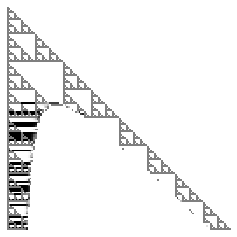

In [20]:
from scipy import linalg

n = 2**7
array_plot(1 - linalg.expm3(np.diag(range(1, n), -1), n) % 2)

Sort of. As you can see we run into precision issues early, but the exact calculation of this algorithm is slow anyway. Lets skip ahead to the randomized version of the algorithm.

6\. [chaos game](http://www.oftenpaper.net/flipbook-chaosgame.htm)

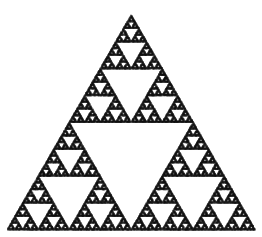

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

vertices = np.array([[0, 0],[1/2, np.sqrt(3)/2],[1, 0]])

def chaos_game(vertices, n):
    pts = vertices[np.random.choice(len(vertices), n)]

    ls = [[0,0]]*n
    for i in range(n-1):
        ls[i+1] = (ls[i] + pts[i])/2
    
    return ls

point_plot(chaos_game(vertices, 100000), markersize=.14)

Easily generalized:

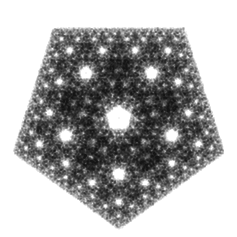

In [22]:
point_plot(chaos_game(-2*circle_points(5, radial_offset=np.pi/10), 200000), markersize=.1)

For the next few ones we're going to need to be able to plot graphs. I found the NetworkX library and managed to get this:

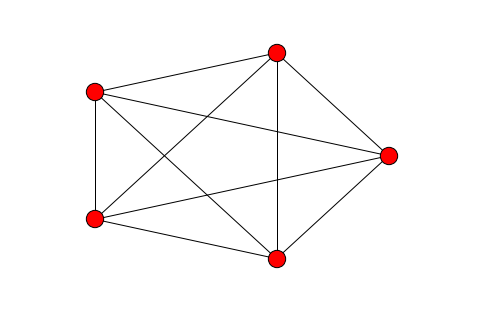

In [23]:
%matplotlib inline
import networkx as nx

nx.draw_circular(nx.complete_graph(5))

Which isn't the worst graphics I've ever seen, but being on the internet we can do better.

In [24]:
Graph(nx.complete_graph(5))

This `sierpinski.Graph` is a simple D3.js layer on top of the NetworkX Graph class, where the NetworkX functions smartly re-use it:

In [25]:
Table(np.transpose([[g, nx.line_graph(g)] for g in
                    [Graph(nx.complete_graph(k)) for k in range(3, 7)]]))

,,,
,,,


Wooo!

[work in progress]